In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data, deal with missing data, sort data, and reset index)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file)
          .dropna()
          .sort_values('alcohol', ascending=False)
          .reset_index(drop=True)
      )

    # Make sure to return the latest dataframe

    return df1

In [3]:
df = load_and_process("../../data/raw/winequality-white.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.350,0.28,1.60,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
1,5.8,0.610,0.01,8.40,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7
2,5.0,0.455,0.18,1.90,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7
3,5.8,0.390,0.47,7.50,0.027,12.0,88.0,0.99070,3.38,0.45,14.00,6
4,5.8,0.290,0.21,2.60,0.025,12.0,120.0,0.98940,3.39,0.79,14.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.310,0.23,3.30,0.052,34.0,113.0,0.99429,3.16,0.48,8.40,5
4894,6.2,0.310,0.23,3.30,0.052,34.0,113.0,0.99429,3.16,0.48,8.40,5
4895,6.4,0.370,0.12,5.90,0.056,6.0,91.0,0.99536,3.06,0.46,8.40,4
4896,4.2,0.215,0.23,5.10,0.041,64.0,157.0,0.99688,3.42,0.44,8.00,3


In [4]:
def rename_and_drop(df):
    
    # Method Chain 2 (Rename columns, identify outliers by quality, and reset the index)

     df2 = (
          df
          .rename(columns = {"total sulfur dioxide":"total SO2"})
          .drop(columns = ['free sulfur dioxide'])                  #we can just use total to avoid redundancy
          .assign(high_quality = lambda x: df['quality']>4)
          .loc[df['residual sugar']<20] #removes outliers from variables using limits determined by box plots
          .loc[df['residual sugar']>2]
          .loc[df['fixed acidity']<9]
          .loc[df['volatile acidity']<0.52]
          .loc[df['citric acid']<0.55]
          .reset_index(drop=True)
      )

     return df2

In [5]:
def refine_data(dataframe): #Refine the dataset down by removing outiers  
    dataframe = (dataframe[dataframe['high_quality']==True]
                 .drop(columns = ['high_quality'])
                 .reset_index(drop = True) # resets the index for the data set after removing rows during data cleaning
                 )
 
    return dataframe

In [6]:
df = rename_and_drop(df)
df = refine_data(df)
df = df.round({"alcohol": 0})            #round alcohol to nearest integer to simplify
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total SO2,density,pH,sulphates,alcohol,quality
0,5.8,0.39,0.47,7.5,0.027,88.0,0.99070,3.38,0.45,14.0,6
1,5.8,0.29,0.21,2.6,0.025,120.0,0.98940,3.39,0.79,14.0,7
2,5.8,0.32,0.20,2.6,0.027,123.0,0.98936,3.36,0.78,14.0,7
3,5.9,0.34,0.22,2.4,0.030,135.0,0.98940,3.41,0.78,14.0,7
4,5.4,0.27,0.22,4.6,0.022,107.0,0.98889,3.33,0.54,14.0,6
...,...,...,...,...,...,...,...,...,...,...,...
3000,6.3,0.20,0.30,5.9,0.034,152.0,0.99642,3.47,0.40,8.0,6
3001,6.5,0.18,0.48,18.0,0.054,183.0,1.00038,2.98,0.61,8.0,6
3002,6.4,0.18,0.48,18.0,0.054,183.0,1.00038,2.98,0.61,8.0,6
3003,6.2,0.31,0.23,3.3,0.052,113.0,0.99429,3.16,0.48,8.0,5


###EDA
---

**Pandas Profiling

In [7]:
#import pandas_profiling as pdp
#profile = pdp.ProfileReport(df)
#profile

**Quality vs. Variable Graphs**
As seen from the pandas profiling report, we will choose the graphs that has the highest correlation with quality

Text(0.5, 1.0, 'Quality vs alcohol graph')

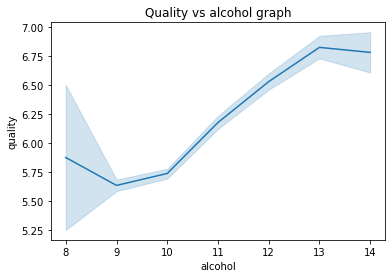

In [8]:
#To see correlation between alcohol and quality
sns.lineplot(data = df,
             y = 'quality',x = 'alcohol').set_title("Quality vs alcohol graph")

Text(0.5, 1.0, 'The quality of wine split by alcohol percentage')

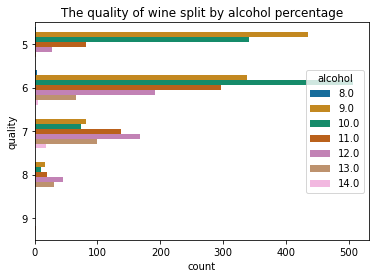

In [9]:
sns.countplot(data = df,
             y = 'quality',
             palette='colorblind',
             hue = 'alcohol').set_title("The quality of wine split by alcohol percentage")

Text(0.5, 1.0, 'Quality vs fixed acidity graph')

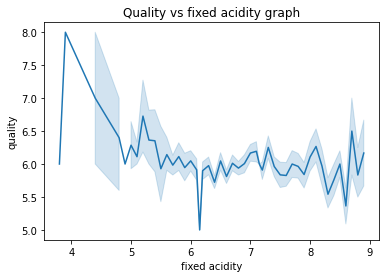

In [10]:
sns.lineplot(data = df,
             y = 'quality',x = 'fixed acidity').set_title("Quality vs fixed acidity graph")

Text(0.5, 1.0, 'Quality vs chlorides graph')

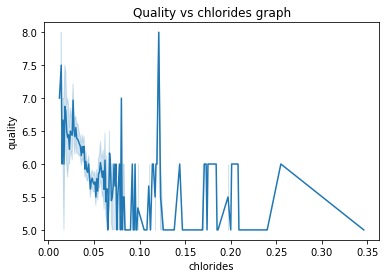

In [11]:
sns.lineplot(data = df,
             y = 'quality',x = 'chlorides').set_title("Quality vs chlorides graph")

Text(0.5, 1.0, 'Quality vs density graph')

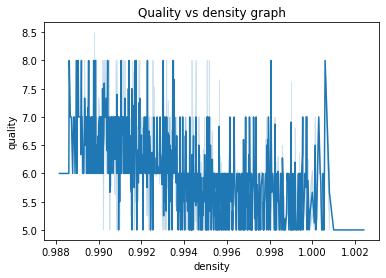

In [12]:
sns.lineplot(data = df,
             y = 'quality',x = 'density').set_title("Quality vs density graph")

Text(0.5, 1.0, 'Quality vs total SO2 graph')

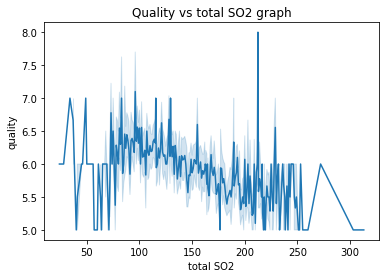

In [13]:
sns.lineplot(data = df,
             y = 'quality',x = 'total SO2').set_title("Quality vs total SO2 graph")

Text(0.5, 1.0, 'Quality vs volatile acidity graph')

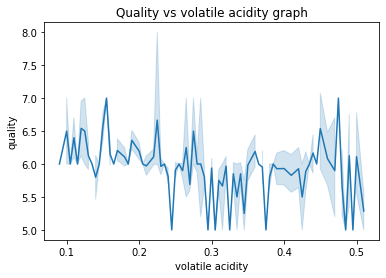

In [14]:
sns.lineplot(data = df,
             y = 'quality',x = 'volatile acidity').set_title("Quality vs volatile acidity graph")

Text(0.5, 1.0, 'Quality vs citric acid graph')

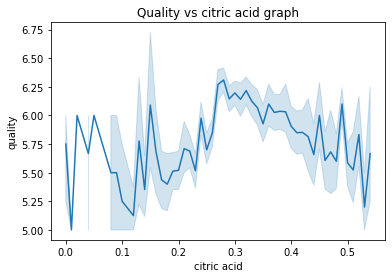

In [15]:
sns.lineplot(data = df,
             y = 'quality',x = 'citric acid').set_title("Quality vs citric acid graph")

Text(0.5, 1.0, 'Quality vs residual sugar graph')

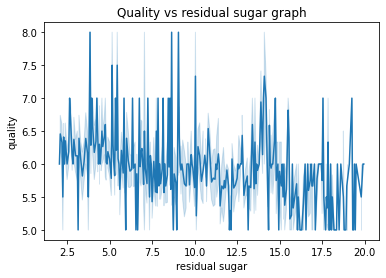

In [16]:
sns.lineplot(data = df,
             y = 'quality',x = 'residual sugar').set_title("Quality vs residual sugar graph")

Text(0.5, 1.0, 'Quality vs pH graph')

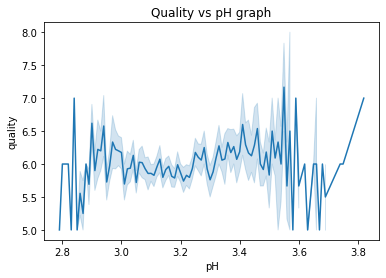

In [17]:
sns.lineplot(data = df,
             y = 'quality',x = 'pH').set_title("Quality vs pH graph")

Text(0.5, 1.0, 'Quality vs sulphates graph')

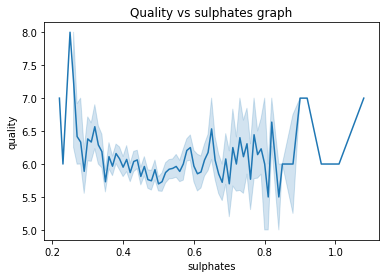

In [18]:
sns.lineplot(data = df,
             y = 'quality',x = 'sulphates').set_title("Quality vs sulphates graph")

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total SO2,density,pH,sulphates,alcohol,quality
count,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000
mean,6.808386,0.274276,0.318998,8.397804,0.045869,146.218469,0.994808,3.180636,0.486333,10.401664,5.981032
std,0.716655,0.079053,0.087231,4.380384,0.020246,40.975257,0.002797,0.142037,0.110171,1.271970,0.813075
min,3.800000,0.090000,0.000000,2.050000,0.012000,24.000000,0.988160,2.790000,0.220000,8.000000,5.000000
25%,6.300000,0.220000,0.260000,4.800000,0.036000,115.000000,0.992700,3.090000,0.410000,9.000000,5.000000
50%,6.800000,0.265000,0.310000,7.700000,0.044000,143.000000,0.995000,3.170000,0.470000,10.000000,6.000000
75%,7.300000,0.320000,0.370000,11.800000,0.051000,176.000000,0.996900,3.260000,0.540000,11.000000,6.000000
max,8.900000,0.510000,0.540000,19.950000,0.346000,313.000000,1.002410,3.820000,1.080000,14.000000,9.000000


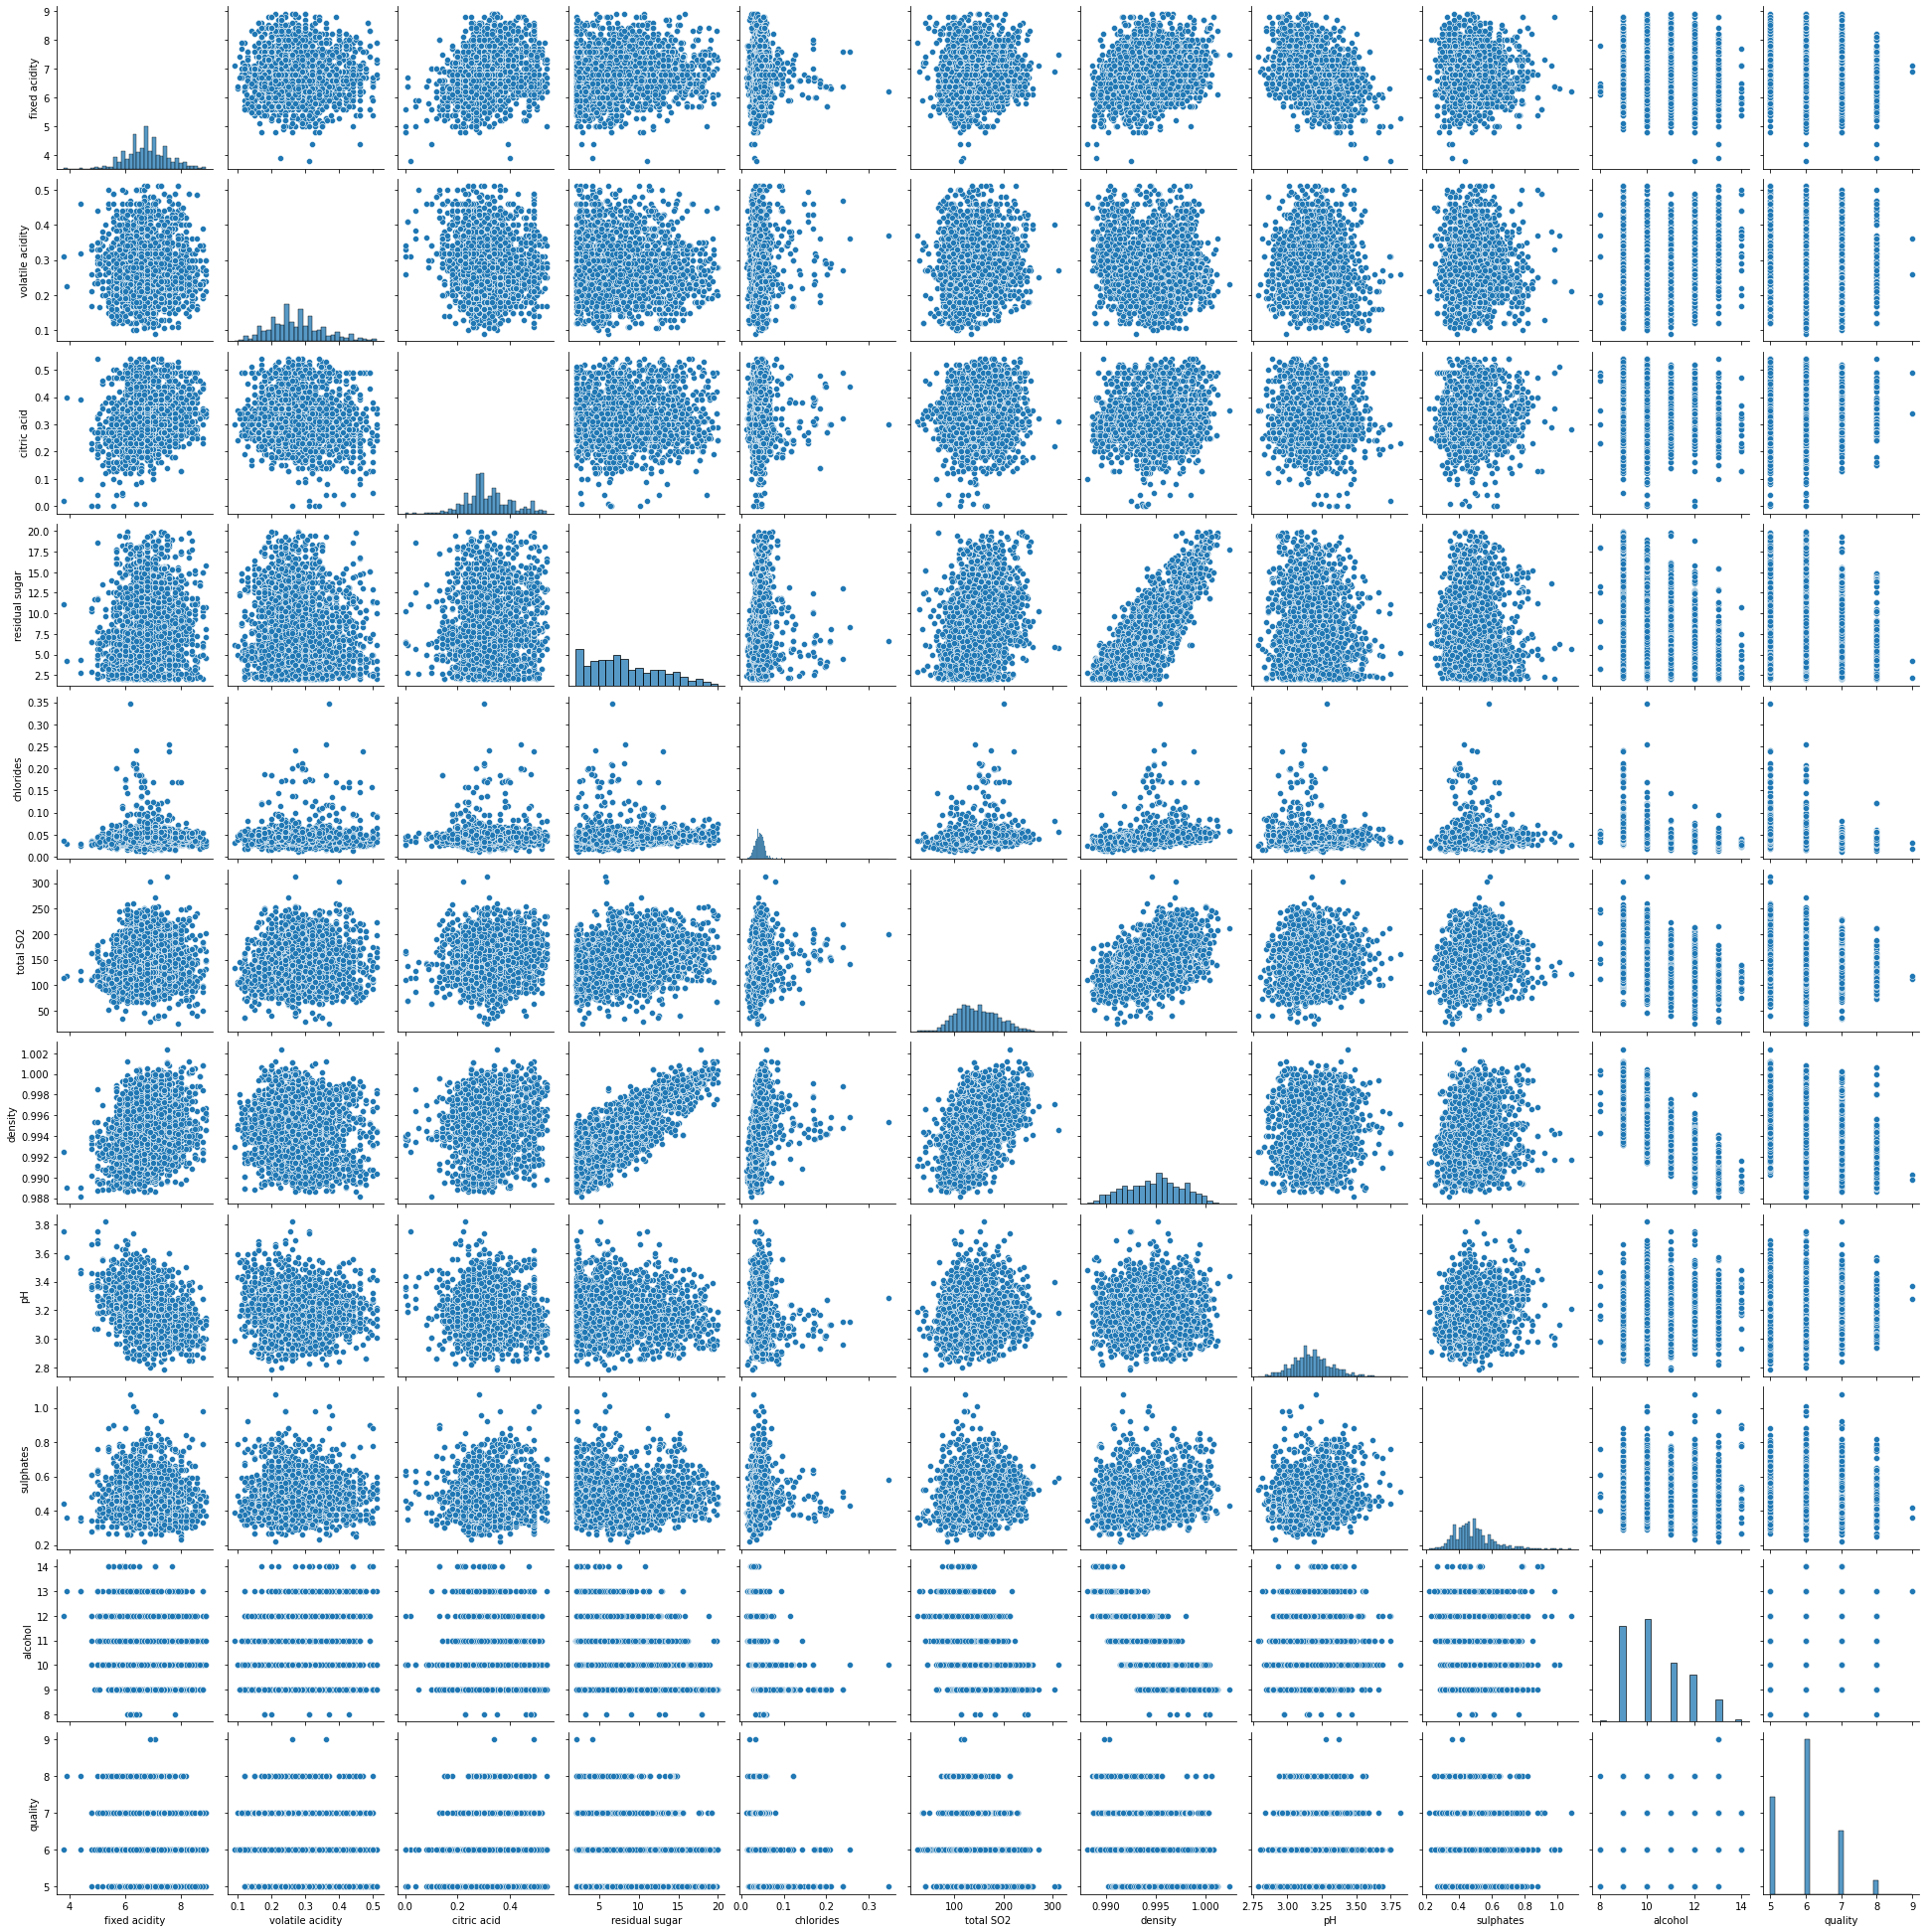

In [20]:
sns.pairplot(df)

**<h1>Analysis</h1>**

*Relationship between variables and quality*

From the graphs and the pandas profiling provided above, we can see the correlation of the variables with the quality of the wine. The correlations we see between the variables and the quality did not show strong correlation; however, certain variables show unique graphs. For example, in the graphs between pH vs quality and sulphates vs quality, the quality is almost constant throughout the graph so it will not be a very important variable towards the quality of the wine. Furthermore, we can see some correlation in two graphs that shows a positive and a negative correlation between the variable and the quality of the wine, which are alcohol and fixed acidity, respectively. We can see that those two variables have the greatest effect on the quality of wine so they are the most important variable when trying to change white wine quality. 

From the graph, alcohol shows a stronger correlation since we can see a clearer positive sloped graph, while in fixed acidity, there are certain outliers that are visible but we can still conclude that the graph is negatively sloped. Additionally, in the total sulfur dioxide vs quality graph, we can also see a negative correlation when the amount of sulfur dioxide makes sense (not too little or too much) and even though the graph is similar to fixed acidity where there are certain outliers, we can still see the correlation of each variables through the line plot which is the easiest to see when determining correlation of each variables to the quality. 

In the countplot and the pandas profiling, we can prove our analysis that as alcohol percentage increases, the quality of the white wine also increases which proves our conclusion that alcohol has a positive correlation with the quality. However, even though we can conclude that there are certain correlation associated between the some variables and the quality of wine, we cannot directly conclude that these variables cause the quality to rise since correlation does not explicitly mean causation. So more research and trial and error would be needed so that the quality of wine can always be improved for customer satisfaction. 